# Practice Project 1

In [25]:
import pandas as pd
import numpy as np

In [26]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [27]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df['quality'].nunique()

6

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

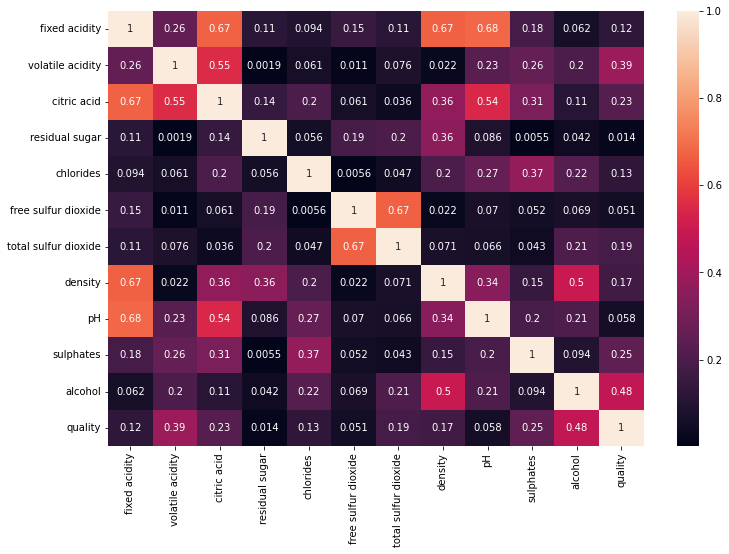

In [9]:
corr= df.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.show

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

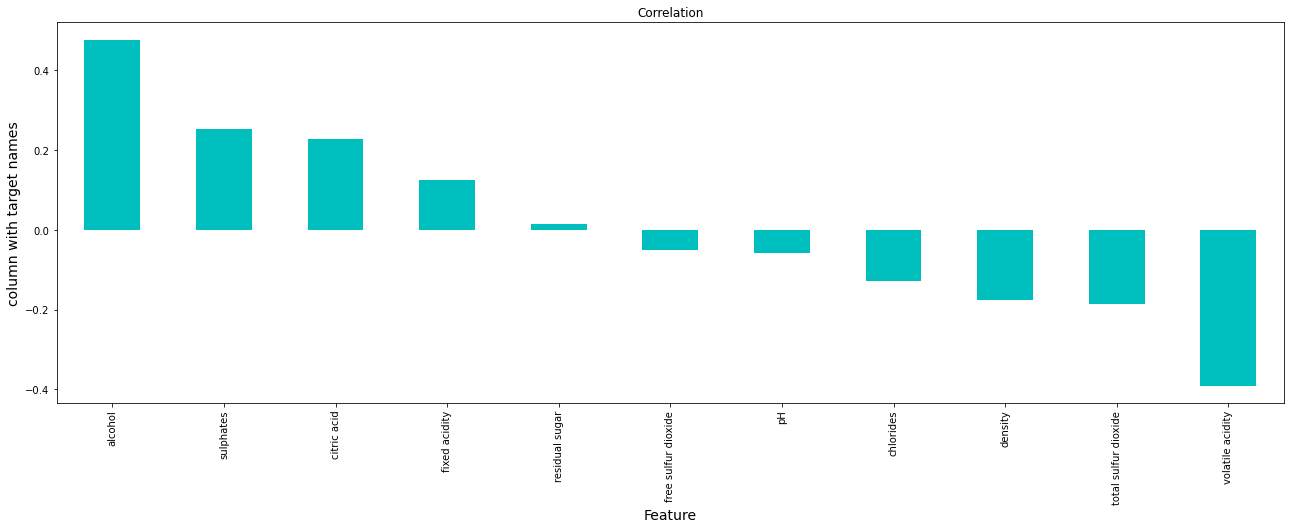

In [11]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending= False).drop(["quality"]).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize =14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import r2_score

In [29]:
x= df.drop(columns=['quality'],axis=1)
y=df['quality']

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=41)

In [31]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print ("\n==== Train Result =====")
        
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100: .2f}%")
        
    elif train == False:
        pred =clf.predict(x_test)
        print ("\n==== Test Result =====")
        print (f"Accuracy score:{accuracy_score(y_test, pred)*100: .2f}%")
        print ("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))

In [32]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)


==== Train Result =====
Accuracy score: 100.00%

==== Test Result =====
Accuracy score: 64.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.08      0.09      0.09        11
           5       0.72      0.72      0.72       157
           6       0.69      0.68      0.68       168
           7       0.52      0.49      0.50        57
           8       0.17      0.25      0.20         4

    accuracy                           0.65       400
   macro avg       0.40      0.43      0.41       400
weighted avg       0.65      0.65      0.65       400



In [18]:
grid_param={'criterion':['gini', 'entropy'], 'max_depth':range(30,45), 'min_samples_leaf':range(2,15), 'min_samples_split':range(3,15),'max_leaf_nodes':range(5,10)}

In [ ]:
grid_search=GridSearchCV(estimator=clf, param_grid=grid_param, cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
best_parameters= grid_search.best_params_
print (best_parameters)

In [ ]:
## train the model with new best parameter 

In [ ]:
clf= DecisionTreeClassifier(criterion= 'entropy', max_depth= 40, max_leaf_nodes= 9, min_samples_leaf= 11, min_samples_split= 5)

clf.fit(x_train, y_train)

In [ ]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)